In [20]:
import sys
import pandas as pd

sys.path.append('..')

In [21]:
import rbf_functions

In [22]:

rbfs = [rbf_functions.squared_exponential_rbf,
#         rbf_functions.gaussian_rbf,
#         rbf_functions.inverse_quadric_rbf
       ]

pareto_sets = {}
for entry in rbfs:
    name = entry.__name__
    output_dir = f"../output/{name}/"
    
    results = pd.read_csv(output_dir + '10_solution.csv')
    results['environment'] = results['environment']
    
    pareto_sets[name] = results


In [23]:
from ema_workbench.analysis.parcoords import ParallelAxes, get_limits

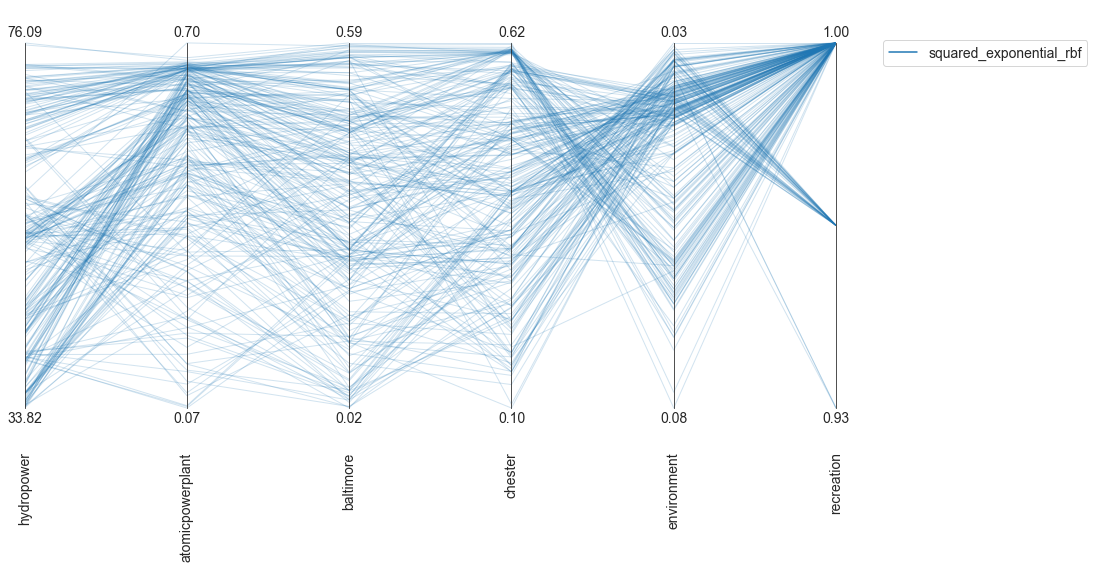

In [24]:
limits = get_limits(pd.concat(pareto_sets.values()))

axes = ParallelAxes(limits)

sns.color_palette()

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes.plot(v, label=k, lw=1, color=c, alpha=0.2)

axes.legend()
axes.invert_axis('environment')

plt.show()

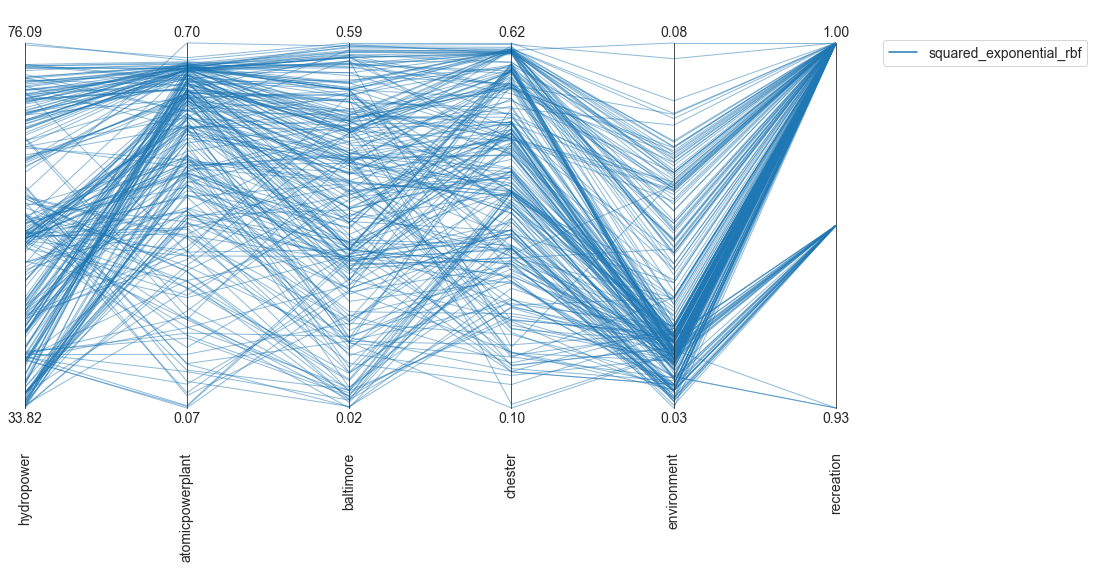

In [25]:
limits = get_limits(pd.concat(pareto_sets.values()))

for (k,v), c in zip(pareto_sets.items(), sns.color_palette()):
    axes = ParallelAxes(limits)    
    axes.plot(v, label=k, lw=1, color=c, alpha=0.5)
    axes.legend()

plt.show()

In [8]:
for k, v in pareto_sets.items():
    v['rbf'] = k

combined = pd.concat(pareto_sets.values())    
combined.head()

,hydropower,atomicpowerplant,baltimore,chester,environment,recreation,rbf
0,31.735618,0.361347,0.100989,0.311985,0.926001,1.000000,squared_exponential_rbf
1,57.076727,0.571417,0.339925,0.328364,0.920918,1.000000,squared_exponential_rbf
2,20.378586,0.134702,0.147722,0.161825,0.927180,0.964286,squared_exponential_rbf
3,20.382436,0.155514,0.063141,0.098572,0.927603,0.964286,squared_exponential_rbf
4,56.202854,0.603913,0.425458,0.442611,0.920403,1.000000,squared_exponential_rbf


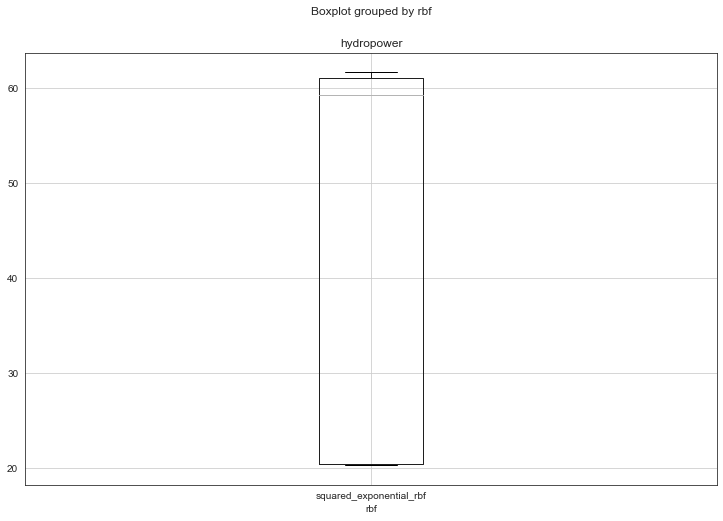

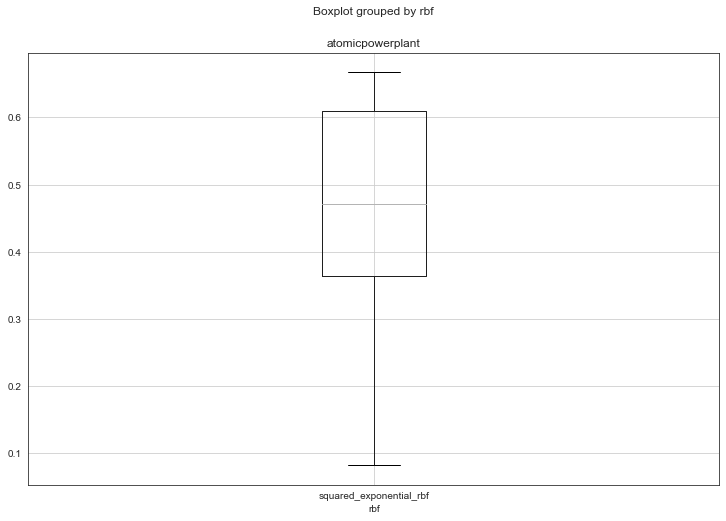

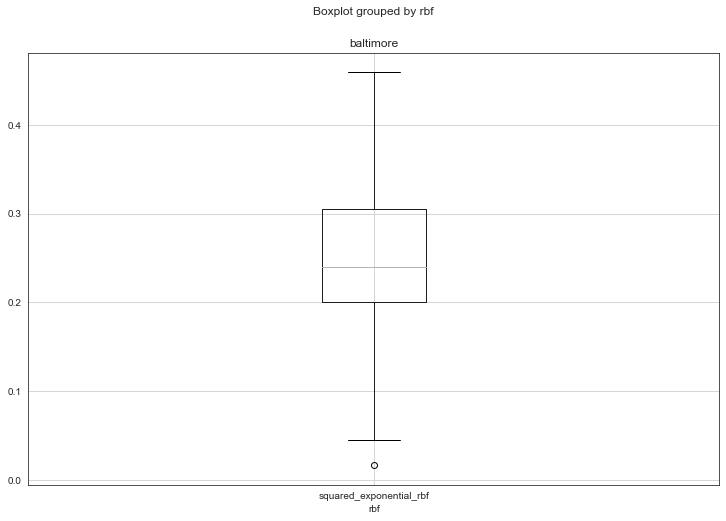

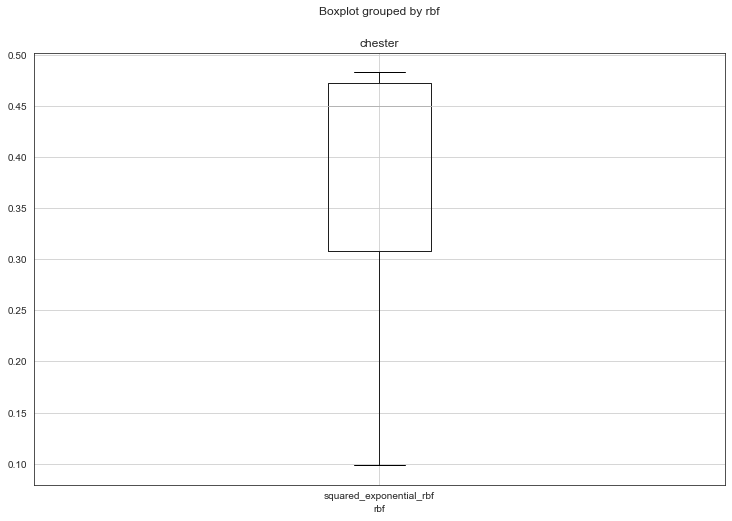

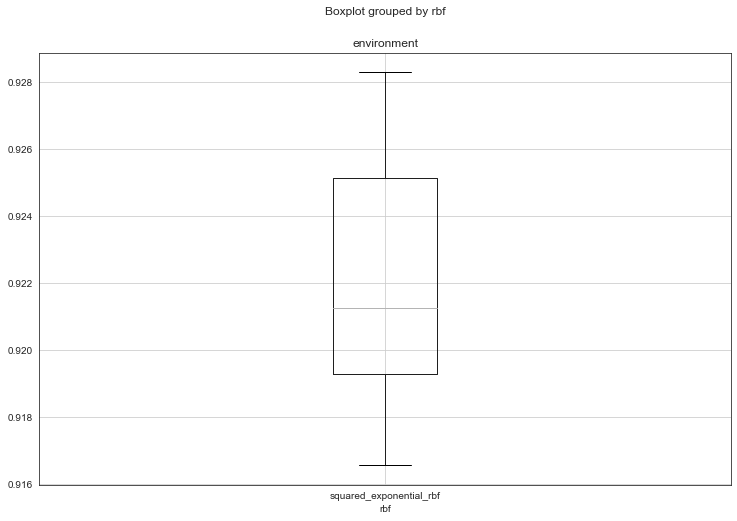

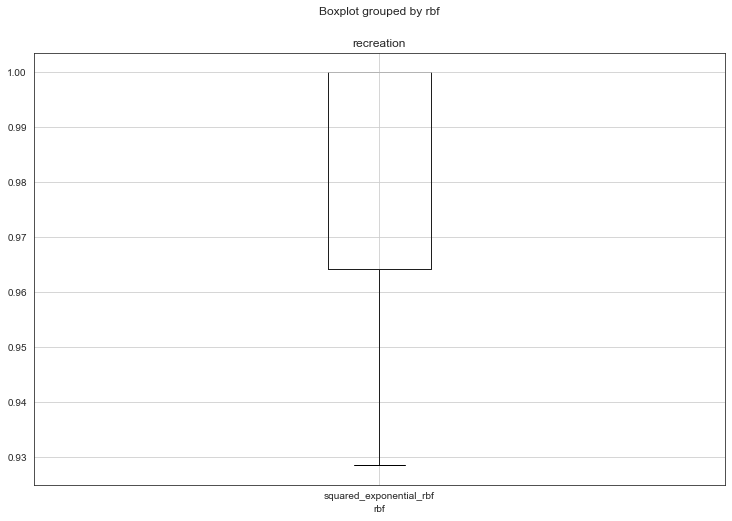

In [9]:
for entry in combined.columns[0:-1]:
    combined.boxplot(column=entry, by='rbf')

plt.show()